In [2]:
#读取数据
filename='4-data.txt'
age_raw = []
distance_raw = []
m = 0
with open(filename,'r') as file_to_read:
    file_to_read.readline()
    while True:    
        lines = file_to_read.readline()
        if not lines:
            break
        m += 1
        age_tmp, dis_tmp = [int(i) for i in lines.split()] 
        age_raw.append(age_tmp)  
        distance_raw.append(dis_tmp)
        age = [(i-18)/64 for i in age_raw]
        distance = [(i-280)/310 for i in distance_raw]
print('member:',m)
print('age:',age)
print('distance:',distance)
X_data = np.matrix(age)
y_data = np.matrix(distance)
X_data = X_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

member: 30
age: [0.0, 0.03125, 0.0625, 0.078125, 0.078125, 0.109375, 0.140625, 0.15625, 0.171875, 0.21875, 0.296875, 0.359375, 0.4375, 0.484375, 0.546875, 0.578125, 0.703125, 0.734375, 0.75, 0.765625, 0.78125, 0.8125, 0.828125, 0.84375, 0.859375, 0.875, 0.890625, 0.921875, 0.953125, 1.0]
distance: [0.7419354838709677, 1.0, 0.9032258064516129, 0.7419354838709677, 0.5806451612903226, 0.6774193548387096, 0.9032258064516129, 0.7419354838709677, 0.5806451612903226, 0.41935483870967744, 0.45161290322580644, 0.5806451612903226, 0.5483870967741935, 0.3225806451612903, 0.5806451612903226, 0.45161290322580644, 0.22580645161290322, 0.45161290322580644, 0.06451612903225806, 0.41935483870967744, 0.06451612903225806, 0.3548387096774194, 0.12903225806451613, 0.2903225806451613, 0.0, 0.45161290322580644, 0.5806451612903226, 0.25806451612903225, 0.0967741935483871, 0.25806451612903225]


In [3]:
import tensorflow as tf
import numpy as np

#搭建线性模型
b = tf.Variable(tf.zeros(1))
W = tf.Variable(tf.zeros(1))
y = W * X_data + b
#最小化方差,训练网络
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
step = optimizer.minimize(loss)
print('step:',step)
# 初始化变量
init = tf.initialize_all_variables()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 拟合直线
for step in range(0, 101):
    sess.run(train)
    if step % 20 == 0:
        theta_1 = sess.run(W)
        theta_0 = sess.run(b)
        print(step) 
print('W:',theta_1)
print('b:',theta_0)

step: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable_2/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_3/ApplyGradientDescent"

Instructions for updating:
Use `tf.global_variables_initializer` instead.


NameError: name 'train' is not defined

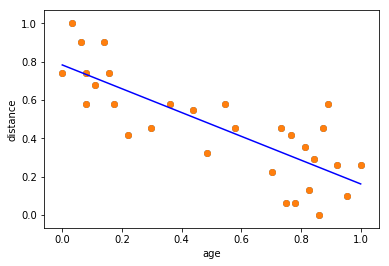

In [7]:
import matplotlib.pyplot as plt
plt.scatter(age,distance)
x1 = np.linspace(0,1,10)
y1 = theta_0 + theta_1 * x1
plt.plot(x1,y1,color='blue')
plt.xlabel('age')
plt.ylabel('distance')
plt.show()